# Lending Club Case Study

## Import all the libraries that are needed

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sb


## Read CSV data File

In [37]:
data = pd.read_csv('D:\Parul\MyUpGrad\Course2_Statistical_Evaluation\group_project\Lending_Club_Project\loan.csv', dtype={'next_pymnt_d': 'str'})


### Take a quick first look at the data to get an idea about attributes and  size of data

In [38]:
data.head(2)  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [40]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [41]:
size = data.shape
nrow = size[0]
ncol = size[1]
print("Number of atributes = {} and number of borrowers = {}".format(size[1], size[0]))


Number of atributes = 111 and number of borrowers = 39717


## Data Cleaning

### Replace blank values by NaN

In [42]:
data2 = data.replace(r'^\s*$', np.nan, regex=True)
data2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [43]:
null_count = data.isnull().sum(axis=0)  # count of null in each columns
print(null_count, max(null_count))


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64 39717


### Remove columns that has all values as NULL as it as no information at all

In [44]:
data = data.dropna(axis = 1, how = 'all')
size1 = data.shape
nrow1 = size1[0]
ncol1 = size1[1]
print("Number of atributes = {} and number of borrowers = {}".format(size1[1], size1[0]))



Number of atributes = 57 and number of borrowers = 39717


### Remove columns that has constant value througout and hence not contributing to any information

In [45]:
#data = data.loc[:, (data != data.iloc[0]).any()] 
data = data.loc[:,data.apply(pd.Series.nunique) != 1]

size2 = data.shape
nrow2 = size2[0]
ncol2 = size2[1]
print("Number of atributes = {} and number of borrowers = {}".format(size2[1], size2[0]))



Number of atributes = 48 and number of borrowers = 39717


###  Drop columns that has unique entries for each row and hence not giving any information that we can use to learn a pattern.  e.g columns 'id', 'member_id', 'url'

### Also the column that has some description and not the kind of data that can be consolidated or grouped to learn something. e.g. 'desc', 'title', 'emp_title'

###  Note: Descriptive data might be helpful if we aply some NLP. But as we are notusing NLP here, we have decided to drop them.

###  'next_pymnt_d' column too is removed as tere is no learning on defaulting

In [46]:
data = data.drop(['id', 'member_id', 'url', 'desc', 'title', 'emp_title', 'next_pymnt_d'], axis=1)
size3 = data.shape
nrow3 = size3[0]
ncol3 = size3[1]
print(" Number of atributes = {} and number of borrowers = {}".format(size3[1], size3[0]))




 Number of atributes = 41 and number of borrowers = 39717


## Let us look at the correlation between all columns. 
## If two columns are highly correlated, we can drop one of the two as, they give same information and hence one is enough, rest are redundant data

In [47]:
print(data.corr())

#data[data.columns[1:-1]].apply(lambda x: x.corr(data['loan_status']))
#plt.figure(figsize =(18.10))
#sns.heatmap(data.corr(), annot = True)
#plt.show

# Observation 1: out_prncp & out_prncp_inv are highly correlated with correlation value = 0.999, so we can drop one of them
# Observation 2: total_pymnt & total_pymnt_inv are also ighlyy correlated, correlation = 0.97, so can drop one of the two

                         loan_amnt  funded_amnt  funded_amnt_inv  installment  \
loan_amnt                 1.000000     0.981578         0.940034     0.930288   
funded_amnt               0.981578     1.000000         0.958422     0.956159   
funded_amnt_inv           0.940034     0.958422         1.000000     0.905039   
installment               0.930288     0.956159         0.905039     1.000000   
annual_inc                0.271149     0.266965         0.254375     0.270874   
dti                       0.066439     0.066283         0.074689     0.054186   
delinq_2yrs              -0.031864    -0.032355        -0.038501    -0.019657   
inq_last_6mths            0.009229     0.009259        -0.005712     0.009722   
mths_since_last_delinq    0.014871     0.016359         0.071924     0.000047   
mths_since_last_record    0.004968    -0.006059         0.437906    -0.062171   
open_acc                  0.177168     0.175530         0.163027     0.172812   
pub_rec                  -0.

### Observation 1: out_prncp & out_prncp_inv are highly correlated with correlation value = 0.999, so we can drop one of them

### Observation 2: total_pymnt & total_pymnt_inv are also ighlyy correlated, correlation = 0.97, so can drop one of the two

### Removing redundant columns based on correlation analysis

In [48]:
data = data.drop(['out_prncp_inv', 'total_pymnt_inv'], axis=1)
size3 = data.shape
nrow3 = size3[0]
ncol3 = size3[1]
print(" After all the removal of columns imparting no information, number of atributes = {} and number of borrowers = {}".format(size3[1], size3[0]))


 After all the removal of columns imparting no information, number of atributes = 39 and number of borrowers = 39717


### Remove rows with invalid data or most entries blank or Nill (if any)

In [49]:
null_count = data.isnull().sum(axis=1)  # count of null in each rows
print(null_count, max(null_count))

# conclusion: no rows with all values as 'null' , so no removal needed based on that


0        2
1        2
2        2
3        1
4        1
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Length: 39717, dtype: int64 4


### Removing rows for which funded_amt_inv = 0 as if no amount was given to the borrower, his or her other data cannot provide any learning for risk analysis


In [50]:
#data2 = data.drop(data[((data.funded_amnt_inv == 0) or (data.loan_status == 'Current')).all(axis=1)].index)
data_filtered = data[data['funded_amnt_inv'] != 0]
print(data_filtered.shape)



(39588, 39)


### Also removing rows for whic loan status is 'Current' as these data to cannot provide any learning for deafaulting. These are the borrowers who are still in process of repaying and so tey have neither defaulted nor fully paid

In [51]:
data_filtered = data_filtered[data_filtered['loan_status'] != 'Current']
print(data_filtered.shape)


(38448, 39)


###  Re-label catagorical columns (to numeric labels) and convert incorrect data types (if any)
### Remove characters because of which a numeric data is becoming string (e.g. % , <, > )

In [52]:
new_data = data_filtered.copy() 
# making a copy of cleaned data, while new_data will have some re-lebelled data, data_filtered will have original labels
# you will see that we need bot kinds of labels when we go for analysis and visualization


In [53]:
# Column 'term' has two types of entries, 36 months and 60 months. So re-lebeling them as '0' and '1' resp
le = LabelEncoder()
new_data['term'] = le.fit_transform(new_data['term']) 
print("After applying LabelEncoder:")
new_data.head(2)

After applying LabelEncoder:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [54]:
# Column 'grade' has 7 types of entries, A, B, C, D, E, F,G. So re-lebeling them as '0' to '6' respectively
le = LabelEncoder()
new_data['grade'] = le.fit_transform(new_data['grade']) 
print("After applying LabelEncoder:")
new_data.head(2)

After applying LabelEncoder:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65%,162.87,1,B2,10+ years,RENT,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27%,59.83,2,C4,< 1 year,RENT,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [55]:
# similarlyy Column 'sub_grade' too is ranked 
le = LabelEncoder()
new_data['sub_grade'] = le.fit_transform(new_data['sub_grade']) 
print("After applying LabelEncoder:")
new_data.head(2)

After applying LabelEncoder:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65%,162.87,1,6,10+ years,RENT,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27%,59.83,2,13,< 1 year,RENT,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [56]:
# Column 'loan_status' has three types of entries, 'Charged Off', 'Current'  and 'Fully Paid'. So re-lebelling them as '0', '1' and '2' resp
le = LabelEncoder()
new_data['loan_status'] = le.fit_transform(new_data['loan_status']) 
print("After applying LabelEncoder:")
new_data.head(2)

After applying LabelEncoder:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65%,162.87,1,6,10+ years,RENT,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27%,59.83,2,13,< 1 year,RENT,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [57]:
# Column 'home_ownership' has four types of entries, 'MORTGAGE', 'RENT', 'OWN' , 'NONE' and 'OTHER'
# As 'NONE' and 'OTHER' both are not contibuting in givingg info on ome ownership, they are alike for us
# So replacing 'OTHER' by 'NONE'
# and re-lebelling 'MORTGAGE', 'NONE', 'OWN' and 'RENT', as '0', '1', '2' and '3' resp

new_data.loc[new_data["home_ownership"] == "OTHER", "home_ownership"] = 'NONE' 

le = LabelEncoder()
new_data['home_ownership'] = le.fit_transform(new_data['home_ownership']) 
print("After applying LabelEncoder:")
new_data.head(2)

After applying LabelEncoder:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65%,162.87,1,6,10+ years,3,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27%,59.83,2,13,< 1 year,3,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [58]:
# Column 'verification_status' has three types of entries, 'Not Verified', 'Verified' and 'Source Verified'. 
# So re-lebelling them as '0', '1' and '2' resp
le = LabelEncoder()
new_data['verification_status'] = le.fit_transform(new_data['verification_status']) 
print("After applying LabelEncoder:")
new_data.head(2)

After applying LabelEncoder:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65%,162.87,1,6,10+ years,3,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27%,59.83,2,13,< 1 year,3,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [59]:
# Column 'int_rate' has interest rate value followed by '%', so removing '%' and transforming column data to tye 'float'
new_data['int_rate'] = new_data['int_rate'].str.replace('[%]', '')
# convert column "int_rate" of a DataFrame
new_data["int_rate"] = pd.to_numeric(new_data["int_rate"])


data.head(2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6076\4149715943.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data['int_rate'] = new_data['int_rate'].str.replace('[%]', '')


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [60]:

# Column 'emp_length' has manyy characters besides number of years which is a numerical value
# so removing all characters tat are not a number
# and assuming tat < 1 is equivalent to 1 year. And 10+ is same as 10 years.
# and transforming column data to tye 'float'
new_data['emp_length'] = new_data['emp_length'].str.replace('[years, year, +, <]', '')
# convert column "int_rate" of a DataFrame
new_data["emp_length"] = pd.to_numeric(new_data["emp_length"])


new_data.head(2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6076\850720736.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data['emp_length'] = new_data['emp_length'].str.replace('[years, year, +, <]', '')


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65,162.87,1,6,10.0,3,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27,59.83,2,13,1.0,3,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [61]:
# Column 'zip_code' zip code followed by 'xx', so removing 'xx'
new_data['zip_code'] = new_data['zip_code'].str.replace('[xx]', '')

new_data.head(2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6076\3698476662.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data['zip_code'] = new_data['zip_code'].str.replace('[xx]', '')


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65,162.87,1,6,10.0,3,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27,59.83,2,13,1.0,3,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [62]:

# Column 'revol_util' has value followed by '%', so removing '%' and converting column data to type 'float'
new_data['revol_util'] = new_data['revol_util'].str.replace('[%]', '')
new_data["revol_util"] = pd.to_numeric(new_data["revol_util"])
new_data.rename(columns = {'revol_util':'%revol_util'}, inplace = True)


new_data.head(2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6076\2848039532.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data['revol_util'] = new_data['revol_util'].str.replace('[%]', '')


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,0,10.65,162.87,1,6,10.0,3,...,5863.155187,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,1,15.27,59.83,2,13,1.0,3,...,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [63]:
# save cleaned data and relableled data as .CSV 
data_filtered.to_csv(r'D:\Parul\MyUpGrad\Course2_Statistical_Evaluation\group_project\Lending_Club_Project\data_Clean.csv', index=False)
new_data.to_csv(r'D:\Parul\MyUpGrad\Course2_Statistical_Evaluation\group_project\Lending_Club_Project\data_relabelled.csv', index=False)
print(data.shape, new_data.shape) # just to confirm both data sizes are same

(39717, 39) (38448, 39)


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

## Let us do Univariate analysis to understand each attribute a little more and get some insights

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


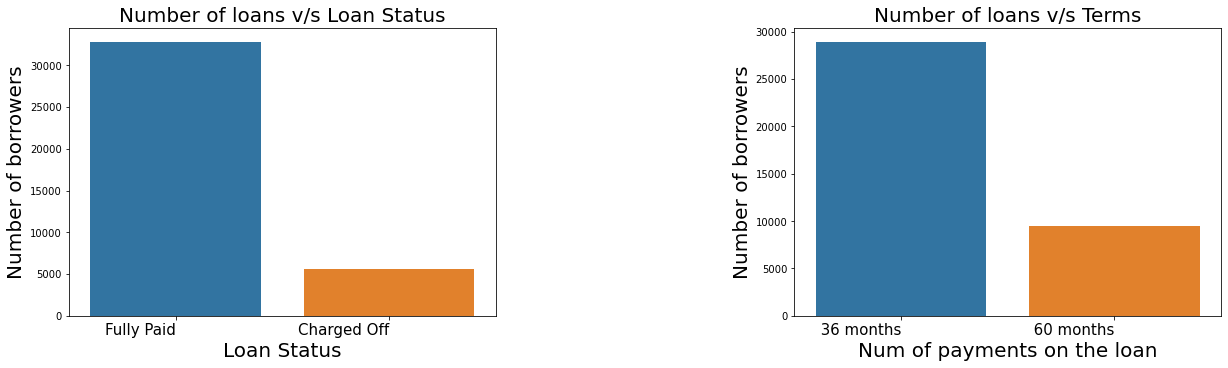

In [113]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.subplot(1, 2, 1)
sb.countplot(data_filtered['loan_status'])
plt.ylabel("Number of borrowers", fontsize = 20)
plt.xlabel("Loan Status", fontsize = 20)
plt.title("Number of loans v/s Loan Status", fontsize = 20)
plt.xticks(fontsize = 15, ha='right')
# plt.bar(data['loan_status'], 0.4, label = 'loan_status')
# plt.legend()



plt.subplot(1, 2, 2)
sb.countplot(data_filtered['term'])
plt.ylabel("Number of borrowers", fontsize = 20)
plt.title("Number of loans v/s Terms", fontsize = 20)
plt.xlabel("Num of payments on the loan", fontsize = 20)
plt.xticks(fontsize = 15, ha='right')



plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)

plt.show()


#### Insights on Loan Status count and Count of different terms

#### Loan Status: While there is no major insights here, it is good to know that number of fully paid loans is significantly higher than num of defaulting loans

#### Term: It is clear that most loans have 36 months term, so we must dig deeper and learn more about Loan status of  those who have 36 months terms. 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


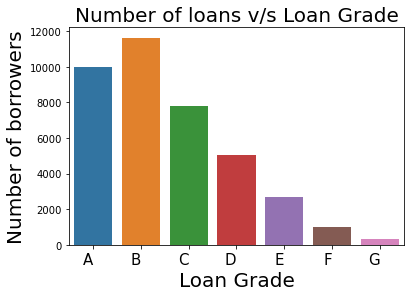

In [109]:
sb.countplot(sorted(data_filtered['grade']))
plt.ylabel("Number of borrowers", fontsize = 20)
plt.xlabel("Loan Grade", fontsize = 20)
plt.title("Number of loans v/s Loan Grade", fontsize = 20)
plt.xticks(fontsize = 15, ha='right')
plt.show()


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


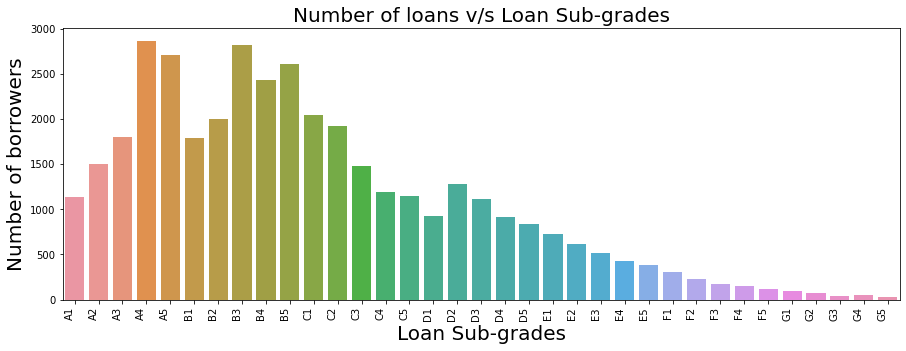

In [107]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

sb.countplot(sorted(data_filtered['sub_grade']))
plt.ylabel("Number of borrowers", fontsize = 20)
plt.xlabel("Loan Sub-grades", fontsize = 20)
plt.title("Number of loans v/s Loan Sub-grades", fontsize = 20)
plt.xticks(rotation=90, fontsize = 10, ha='right')
plt.show()


#### Insights on Loan Grades and Sub-Grades

#### Loan Grade: Almost 1/3rd of total loans are of grade B and 1/4th are of Grade A, 1/5t is of Grade C. So together, Grade A, B, C and D is covering majority loans. We need to analyse them further to ensure these afre all 'low-risk' loans

#### Loan Sub-Grade: This is in sync with Grade. We need to dig deeper, especially for sub-grade A4, A5, B3, B4, B5 and ensure these are 'low-risk' loans

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'AZ'),
  Text(1, 0, 'GA'),
  Text(2, 0, 'IL'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'NC'),
  Text(5, 0, 'TX'),
  Text(6, 0, 'VA'),
  Text(7, 0, 'MO'),
  Text(8, 0, 'CT'),
  Text(9, 0, 'UT'),
  Text(10, 0, 'FL'),
  Text(11, 0, 'NY'),
  Text(12, 0, 'PA'),
  Text(13, 0, 'MN'),
  Text(14, 0, 'NJ'),
  Text(15, 0, 'OR'),
  Text(16, 0, 'KY'),
  Text(17, 0, 'OH'),
  Text(18, 0, 'SC'),
  Text(19, 0, 'RI'),
  Text(20, 0, 'LA'),
  Text(21, 0, 'MA'),
  Text(22, 0, 'WA'),
  Text(23, 0, 'WI'),
  Text(24, 0, 'AL'),
  Text(25, 0, 'NV'),
  Text(26, 0, 'AK'),
  Text(27, 0, 'CO'),
  Text(28, 0, 'MD'),
  Text(29, 0, 'WV'),
  Text(30, 0, 'VT'),
  Text(31, 0, 'MI'),
  Text(32, 0, 'DC'),
  Text(33, 0, 'SD'),
  Text(34, 0, 'NH'),
  Text(35, 0, 'AR'),
  Text(36, 0, 'NM'),
  Text(

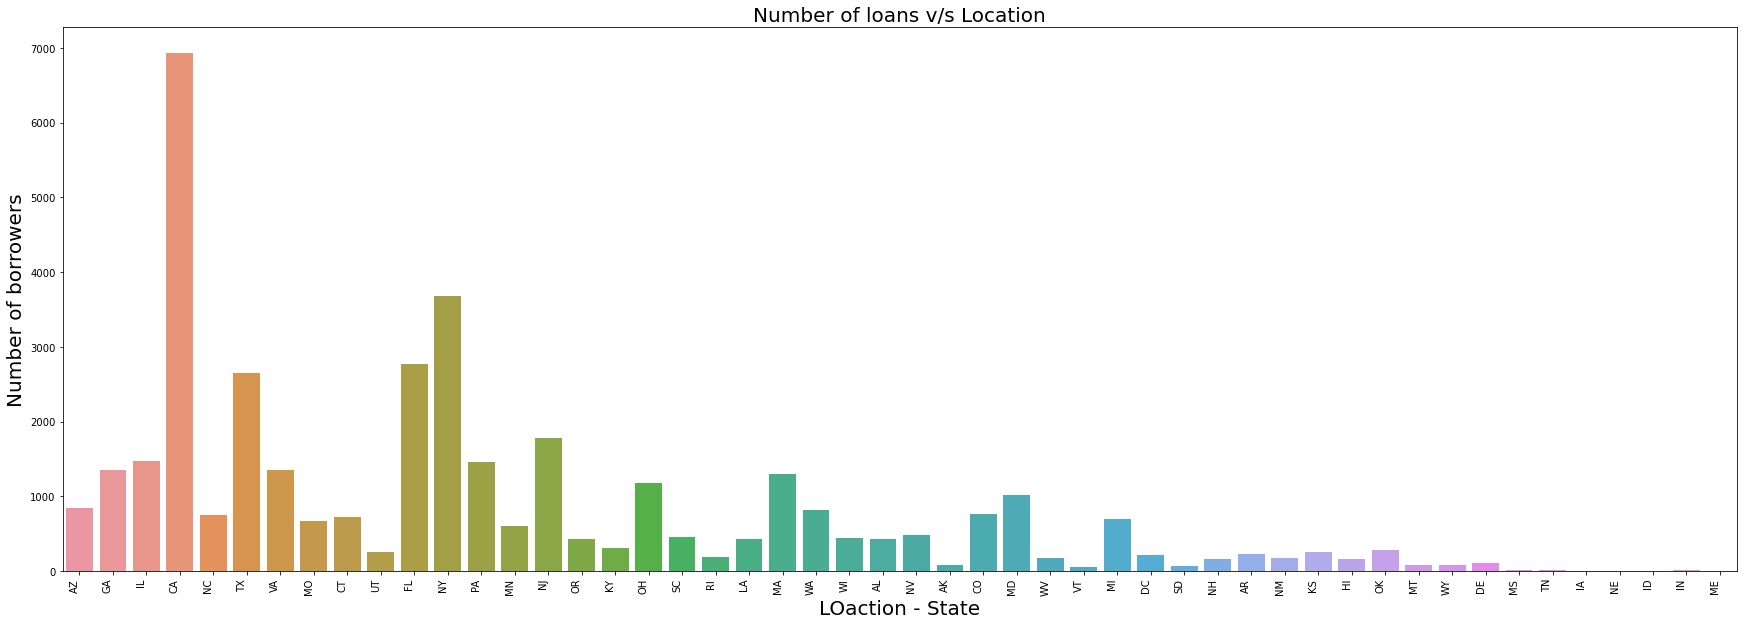

In [106]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

plt.xticks(rotation=90, ha='right')
sb.countplot(new_data['addr_state'])
plt.ylabel("Number of borrowers", fontsize = 20)
plt.xlabel("Location - State", fontsize = 20)
plt.title("Number of loans v/s Location", fontsize = 20)
plt.xticks(rotation=90, fontsize = 10, ha='right')


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


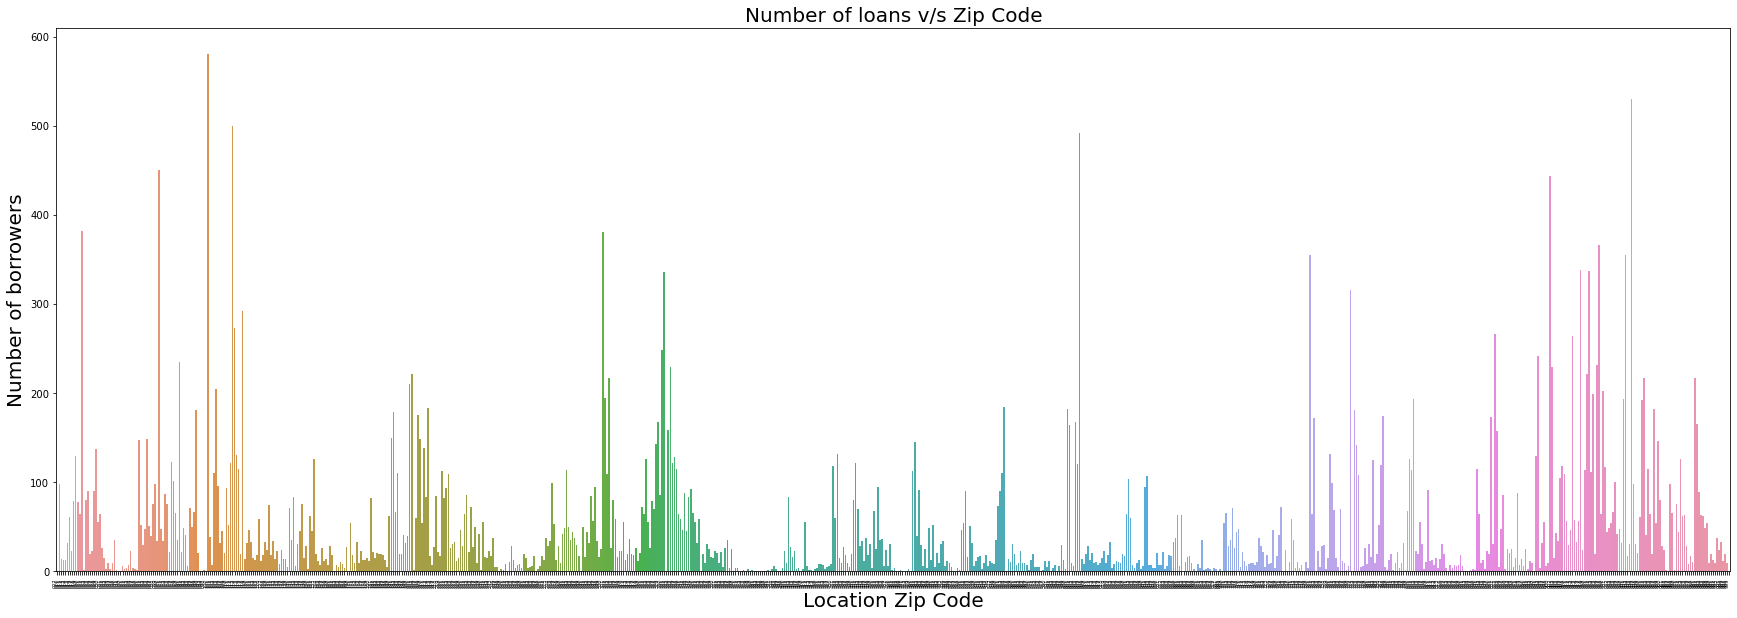

In [105]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

sb.countplot(sorted(new_data['zip_code']))
plt.ylabel("Number of borrowers", fontsize = 20)
plt.xlabel("Location - Zip Code", fontsize = 20)
plt.title("Number of loans v/s Zip Code", fontsize = 20)
plt.xticks(rotation=90, fontsize = 5, ha='right')

plt.show()

#### Insigts on Location

#### State: Some of the states significantly larger number of loans compared to others and hence need to study them further. e.g CA, NY, FL, TX

#### Zip Code: Zip also show some tall spikes, those zip codes need furter analysis. (Note: It is difficult to read zip code on this graph, but we can find out those spikes by further inspection

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


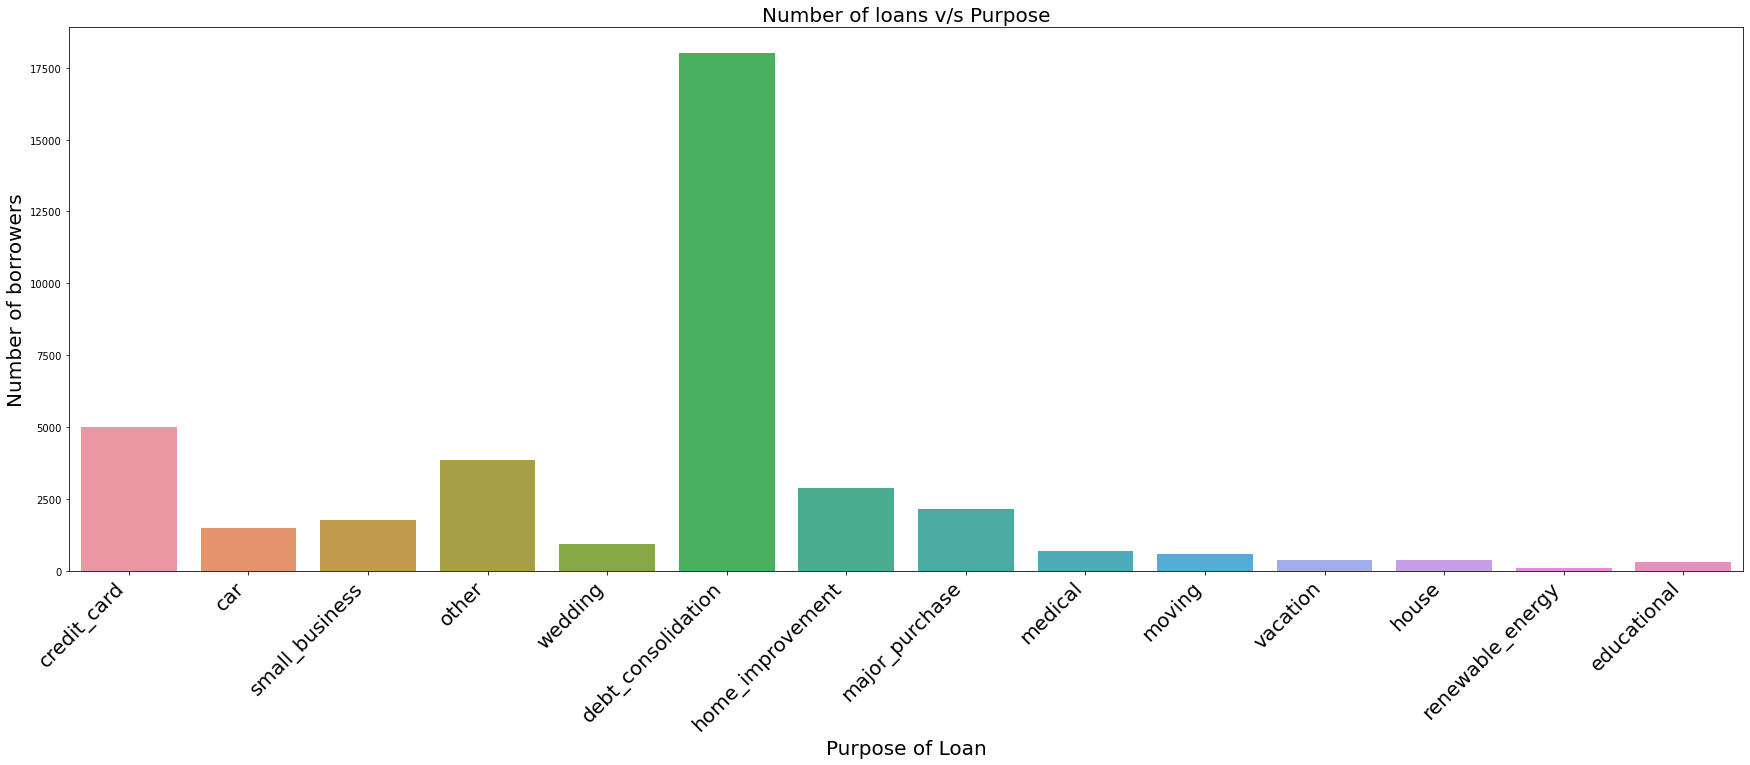

In [104]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

sb.countplot(new_data['purpose'])
plt.ylabel("Number of borrowers", fontsize = 20)
plt.xlabel("Purpose of Loan", fontsize = 20)
plt.title("Number of loans v/s Purpose", fontsize = 20)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.show()

#### Insigts on Purpose of taking Loan

####  A huge number of loan is taken for debt consolidation and credit card payments. Both these catogory fall into not-secured loans and hence it is very important to know that these loans are 'low-risk'. This needs further analysis

#### "othher' also shows good number of loans, as there is no more information about thses loans, may be we can check their grades and sub-grades to understand them better


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'OWN'),
  Text(2, 0, 'MORTGAGE'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'NONE')])

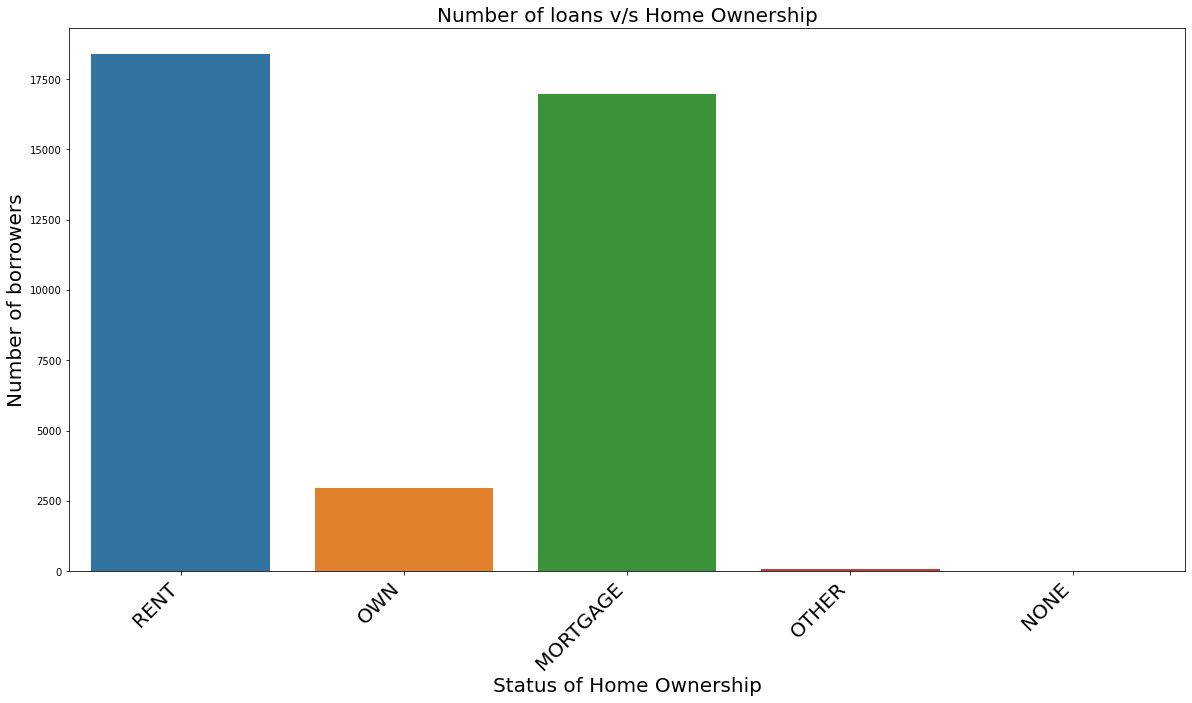

In [103]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

sb.countplot(data_filtered['home_ownership'])
plt.ylabel("Number of borrowers", fontsize = 20)
plt.xlabel("Status of Home Ownership", fontsize = 20)
plt.title("Number of loans v/s Home Ownership", fontsize = 20)
plt.xticks(rotation=45, fontsize = 20, ha='right')


#### Insigts on Home ownership status

#### This too indicates that most loans are not-secured as a huge majority given to borrowers who either do not own a ome or have already mortgaged it. NOT a good scenario and definitely need further investigations.


## Time for some Bivariate analysis to dig deepper and understand their correlation with risk 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


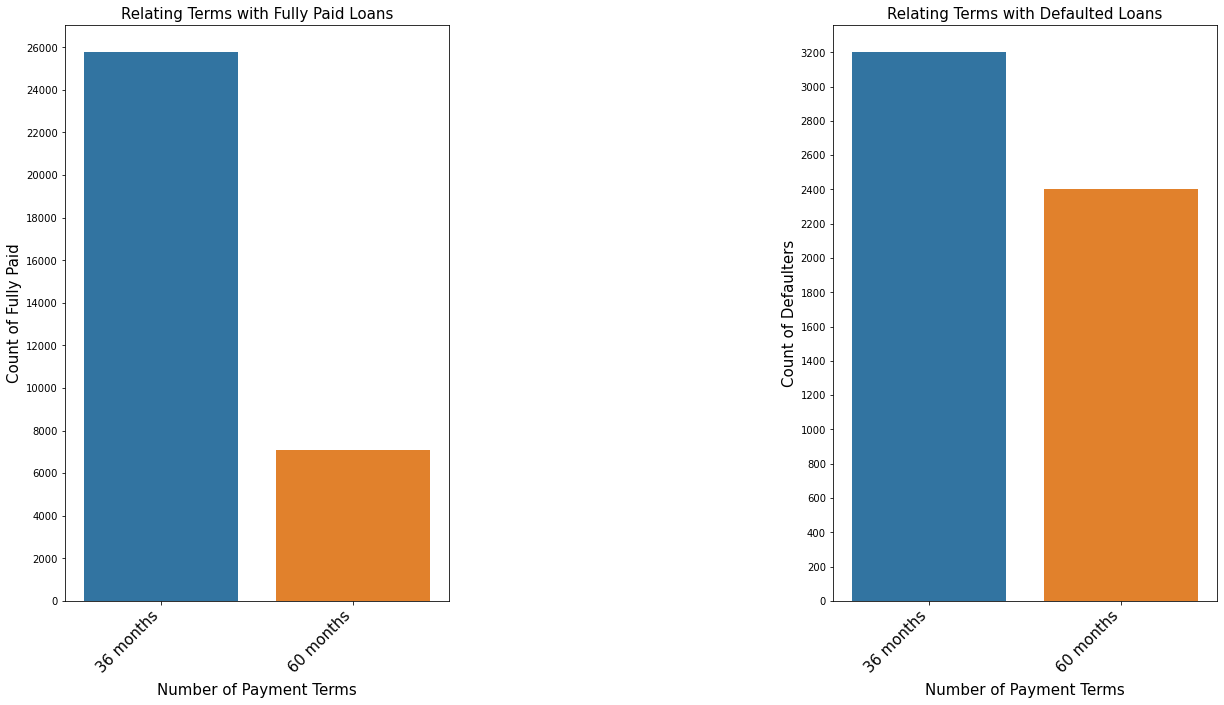

In [124]:
# Analysis of 'term' v/s Risk
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

data_term_paid = data_filtered[data_filtered['loan_status'] == 'Fully Paid']
plt.subplot(1, 2, 1)
sb.countplot(sorted(data_term_paid['term']))
plt.xticks(rotation=45, fontsize = 15, ha='right')
plt.yticks(np.arange(0, 28000, 2000))
plt.ylabel('Count of Fully Paid', fontsize = 15)
plt.xlabel("Number of Payment Terms", fontsize = 15)
plt.title("Relating Terms with Fully Paid Loans", fontsize = 15)




data_term_default = data_filtered[data_filtered['loan_status'] == 'Charged Off']
plt.subplot(1, 2, 2)
sb.countplot(sorted(data_term_default['term']))
plt.xticks(rotation=45, fontsize = 15, ha='right')
plt.yticks(np.arange(0, 3300, 200))
plt.ylabel('Count of Defaulters', fontsize = 15)
plt.xlabel("Number of Payment Terms", fontsize = 15)
plt.title("Relating Terms with Defaulted Loans", fontsize = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9999, 
                    hspace=0.5)

plt.show()

### Conclusion on relation of terms with risk

### Ratio of fully paid to defaulters for 36 months term is much higher compared to 60 months.
### Which means, 36 months loans are far more less risky than 60 months loans

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


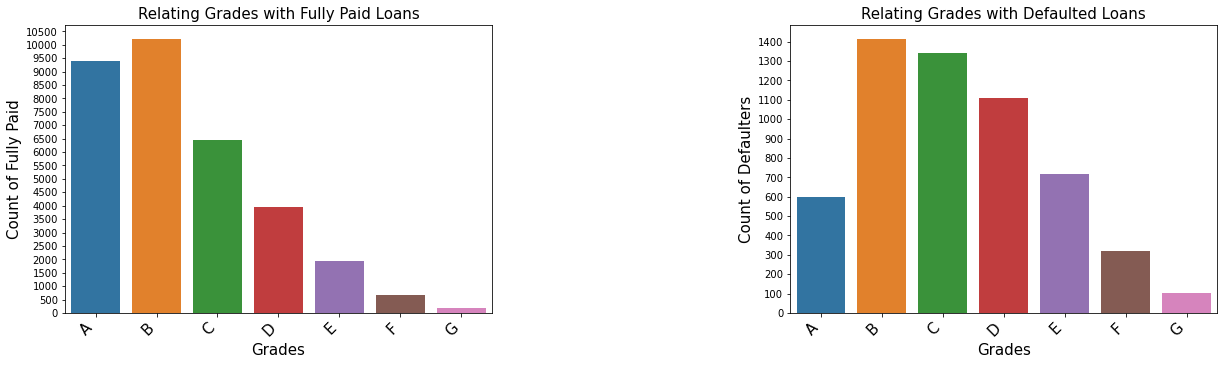

In [123]:
# Analysis of 'grade' v/s Risk
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

data_grade_paid = data_filtered[data_filtered['loan_status'] == 'Fully Paid']
plt.subplot(1, 2, 1)
sb.countplot(sorted(data_grade_paid['grade']))
plt.xticks(rotation=45, fontsize = 15, ha='right')
plt.yticks(np.arange(0, 11000, 500))
plt.ylabel('Count of Fully Paid', fontsize = 15)
plt.xlabel("Grades", fontsize = 15)
plt.title("Relating Grades with Fully Paid Loans", fontsize = 15)




data_grade_default = data_filtered[data_filtered['loan_status'] == 'Charged Off']
plt.subplot(1, 2, 2)
sb.countplot(sorted(data_grade_default['grade']))
plt.xticks(rotation=45, fontsize = 15, ha='right')
plt.yticks(np.arange(0, 1500, 100))
plt.ylabel('Count of Defaulters', fontsize = 15)
plt.xlabel("Grades", fontsize = 15)
plt.title("Relating Grades with Defaulted Loans", fontsize = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)

plt.show()

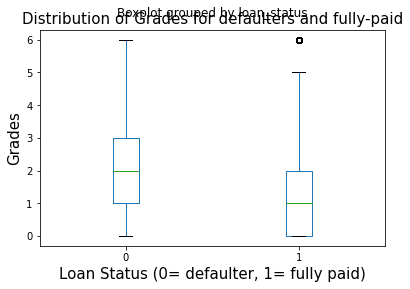

In [170]:
new_data.boxplot(by ='loan_status', column = ['grade'], grid = False)
plt.ylabel('Grades', fontsize = 15)
plt.xlabel("Loan Status (0= defaulter, 1= fully paid)", fontsize = 15)
plt.title("Distribution of Grades for defaulters and fully-paid", fontsize = 15)

plt.show()

# Note: On x-axis : 0 = "Charged off"  & 1 = "Fully Paid"
# NOte: On Y-axis: 0 to 6 = Grade A to Grade G


### Conclusion on relation of Grades with Loan status

### Conclusion 1: First bar chart indicates that Grade A & B makes almost 50% of total fully paid loans. This is evident in the box plot too. If we examine second bar chart (of defaulters), Grade A makes less than half of Grade B and C. 
### This shows that Grade A is one of the most safest and 'low-risk' loan.

### Conclusion 2: From bar charts we can see that ratio of defaulters to fully paid in grade B is approximately 0.14. Box plots sows that 25% of all defaulters are under Grade B.  This makes Grade B also relatively a low-risk loan

### Conclusion 3:  75% of fully paid loans are under Grade A, B & C, so Grade C  is a  moderate-risk loan

### Conclusion 3: Above Grade C is what needs more attention. 

### Conclusion 4: Box plot shows, maximum Grade of Fully paid is Grade F (not considering the outliers), which makes Grade G a very high-risk loan,  almost sure shot defaulters. 

### We can analyse what are the purposes that fall under Grade G and get more pointers on which catagories should be avoided. Let us do that in the next step

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relating Grades of defaulting loans with Purpose of Loans')

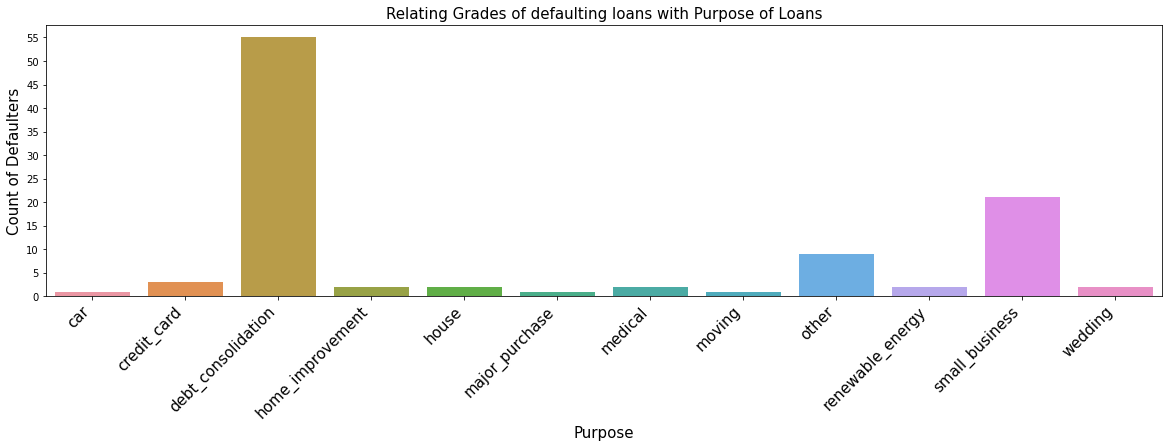

In [145]:
# Analysis of 'grade G' v/s 'Purpose' for defaulting loans
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

data_gradeG_default = data_grade_default[data_grade_default['grade'] == 'G']

sb.countplot(sorted(data_gradeG_default['purpose']))
plt.xticks(rotation=45, fontsize = 15, ha='right')
plt.yticks(np.arange(0, 60, 5))
plt.ylabel('Count of Defaulters', fontsize = 15)
plt.xlabel("Purpose", fontsize = 15)
plt.title("Relating Grades of defaulting loans with Purpose of Loans", fontsize = 15)



### Conclusion on relation of Grades G with Purpose

### The bar chart clearly indicates that debt_consolidation loans are high-risk loans, more likely to default. 
### small_business and 'other' too are relatively high-risk and must be looked into properly before sanctioning the loan 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


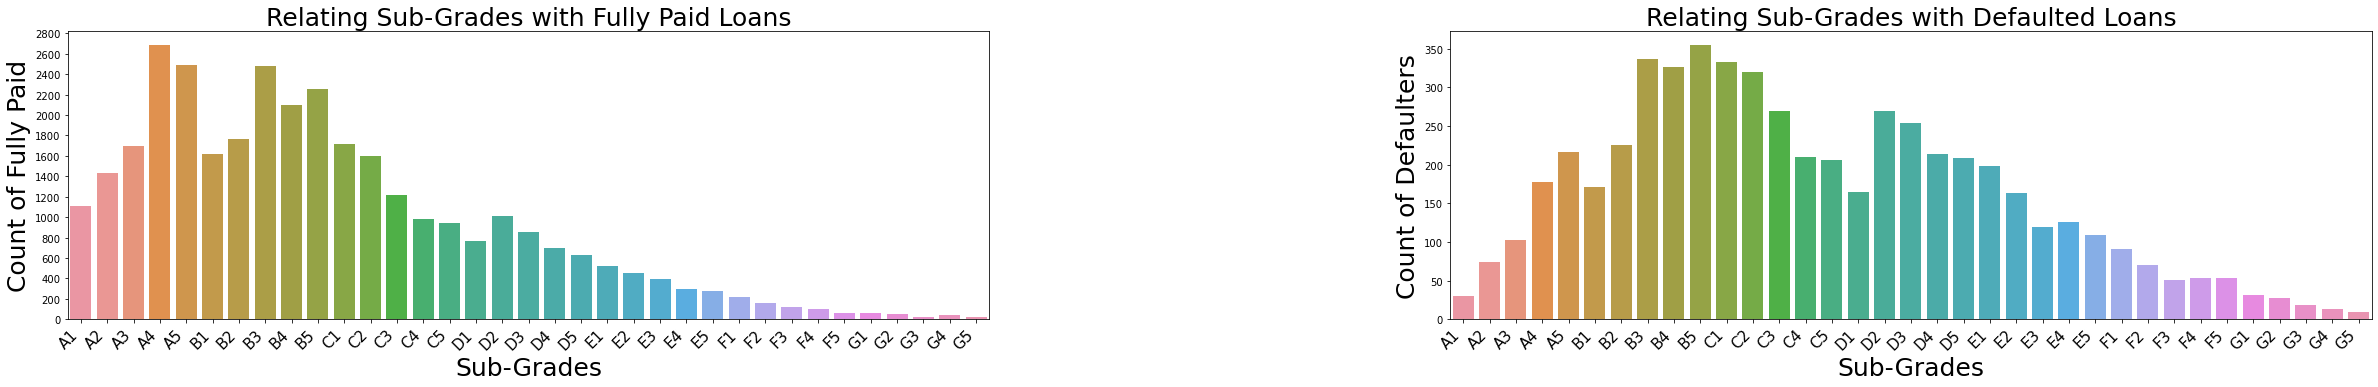

In [167]:
# Analysis of 'sub_grade' v/s Risk
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

data_subgrade_paid = data_filtered[data_filtered['loan_status'] == 'Fully Paid']
plt.subplot(1, 2, 1)
sb.countplot(sorted(data_subgrade_paid['sub_grade']))
plt.xticks(rotation=45, fontsize = 15, ha='right')
plt.yticks(np.arange(0, 3000, 200))
plt.ylabel('Count of Fully Paid', fontsize = 25)
plt.xlabel("Sub-Grades", fontsize = 25)
plt.title("Relating Sub-Grades with Fully Paid Loans", fontsize = 25)




data_subgrade_default = data_filtered[data_filtered['loan_status'] == 'Charged Off']
plt.subplot(1, 2, 2)
sb.countplot(sorted(data_subgrade_default['sub_grade']))
plt.xticks(rotation=45, fontsize = 15, ha='right')
plt.yticks(np.arange(0, 400, 50))
plt.ylabel('Count of Defaulters', fontsize = 25)
plt.xlabel("Sub-Grades", fontsize = 25)
plt.title("Relating Sub-Grades with Defaulted Loans", fontsize = 25)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

plt.show()

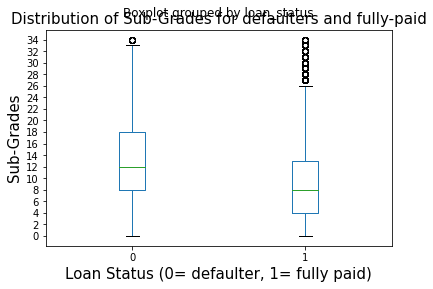

In [172]:
new_data.boxplot(by ='loan_status', column = ['sub_grade'], grid = False)
plt.yticks(np.arange(0, 35, 2))
plt.ylabel('Sub-Grades', fontsize = 15)
plt.xlabel("Loan Status (0= defaulter, 1= fully paid)", fontsize = 15)
plt.title("Distribution of Sub-Grades for defaulters and fully-paid", fontsize = 15)

plt.show()


### Conclusion on relation of Sub-Grades with Loan status

### Conclusion 1: Once again it shows that Sub-Grades of A are less likely to default and hence they are some of the most low-risk grades.

###  Conclusion 2: 75% of fully paid loans are below sub_grade C3 (Rank 13), so these grades are relatively low-risk loans

### Conclusion 3: 50% of defaulters are between sub_grade B4 to D4 (rank 8 to 18). A little more scrutiny needed for these grades before sanctioning the loan.

### Conclusion 4: Grade F3 (rank 27) and above are higly likely to default.
### SUb-Grades of G once again proves to be the riskiest sub-grades
  


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


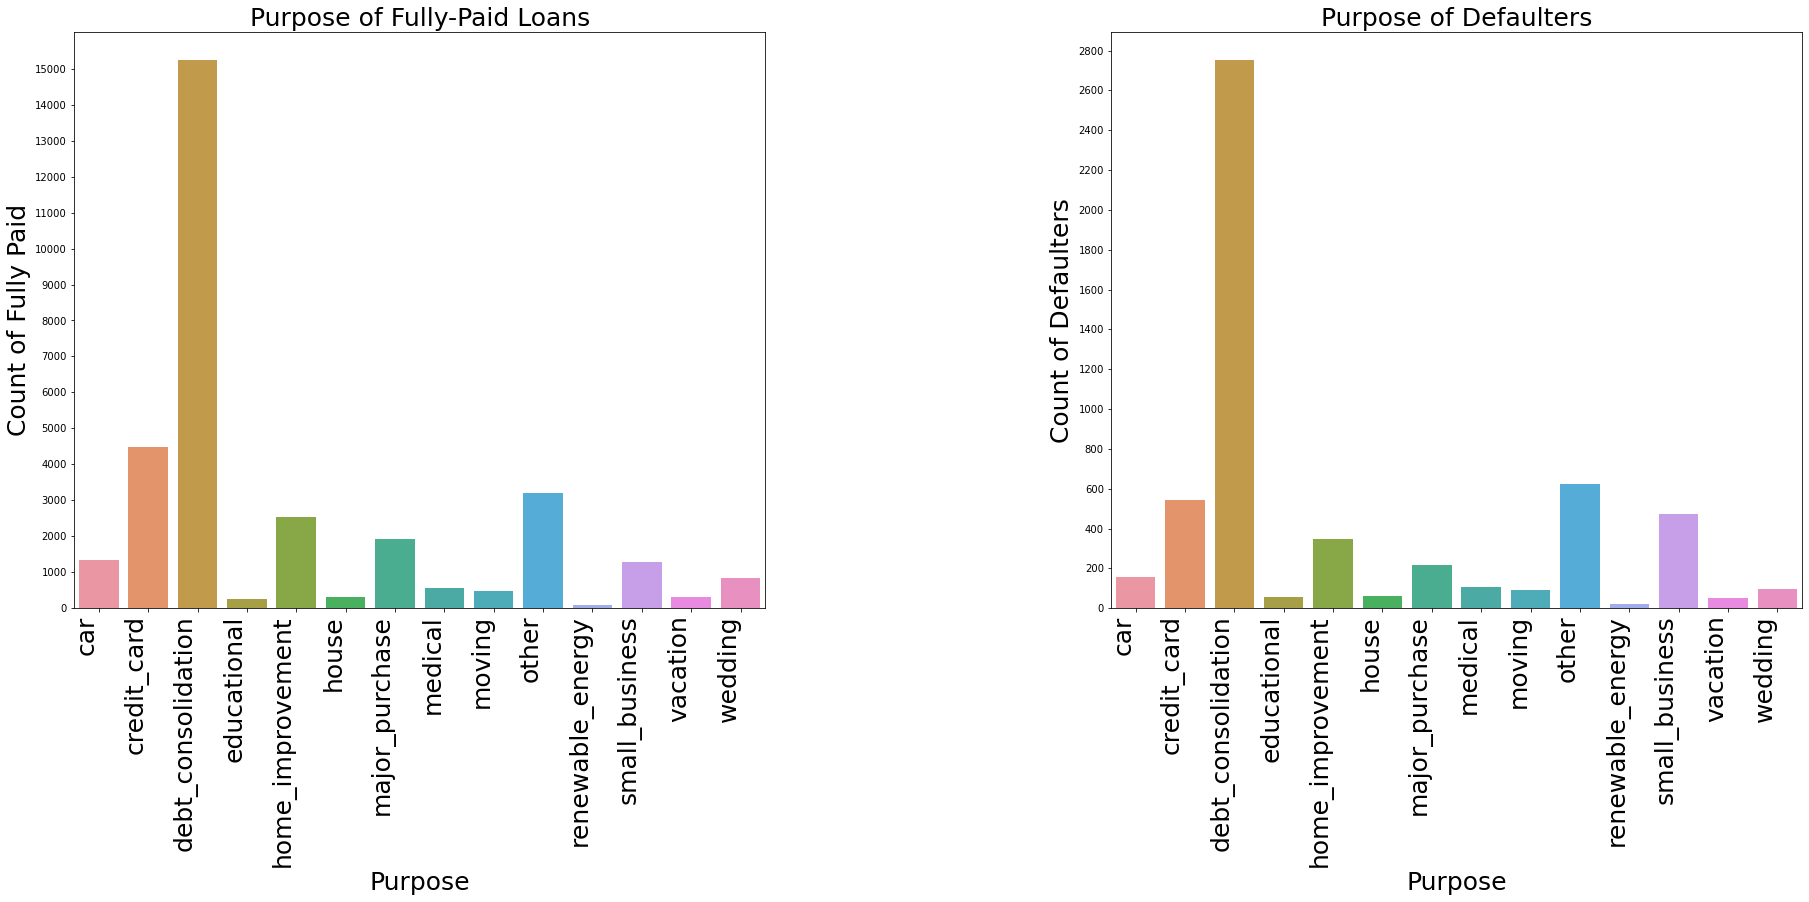

In [185]:
# Risk analysis of 'Purpose' of loan
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

data_purpose = data_filtered[data_filtered['loan_status'] == 'Fully Paid']
plt.subplot(1, 2, 1)
plt.title('Purpose of Fully-Paid Loans', fontsize = 25)
plt.xticks(rotation=90,fontsize = 25, ha='right')
sb.countplot(sorted(data_purpose['purpose']))
plt.yticks(np.arange(0, 16000, 1000))
plt.ylabel('Count of Fully Paid', fontsize = 25)
plt.xlabel("Purpose", fontsize = 25)


data_purpose = data_filtered[data_filtered['loan_status'] == 'Charged Off']
plt.subplot(1, 2, 2)
plt.title('Purpose of Defaulters', fontsize = 25)
plt.xticks(rotation=90, fontsize = 25, ha='right')
sb.countplot(sorted(data_purpose['purpose']))
plt.yticks(np.arange(0, 3000, 200))
plt.ylabel('Count of Defaulters', fontsize = 25)
plt.xlabel("Purpose", fontsize = 25)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

plt.show()



### Conclusion on effect of Purpose of Loan on defaulting

### Conclusion 1: Once again it shows that loans taken for debt_consolidation is highly likely to default and hence they are high-risk. Process to sanction them should be tightened.

### Conclusion 2: Same sould be done for 'Other', 'Credit_card' and 'small_business' catagories. They too look like high-risk loans


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


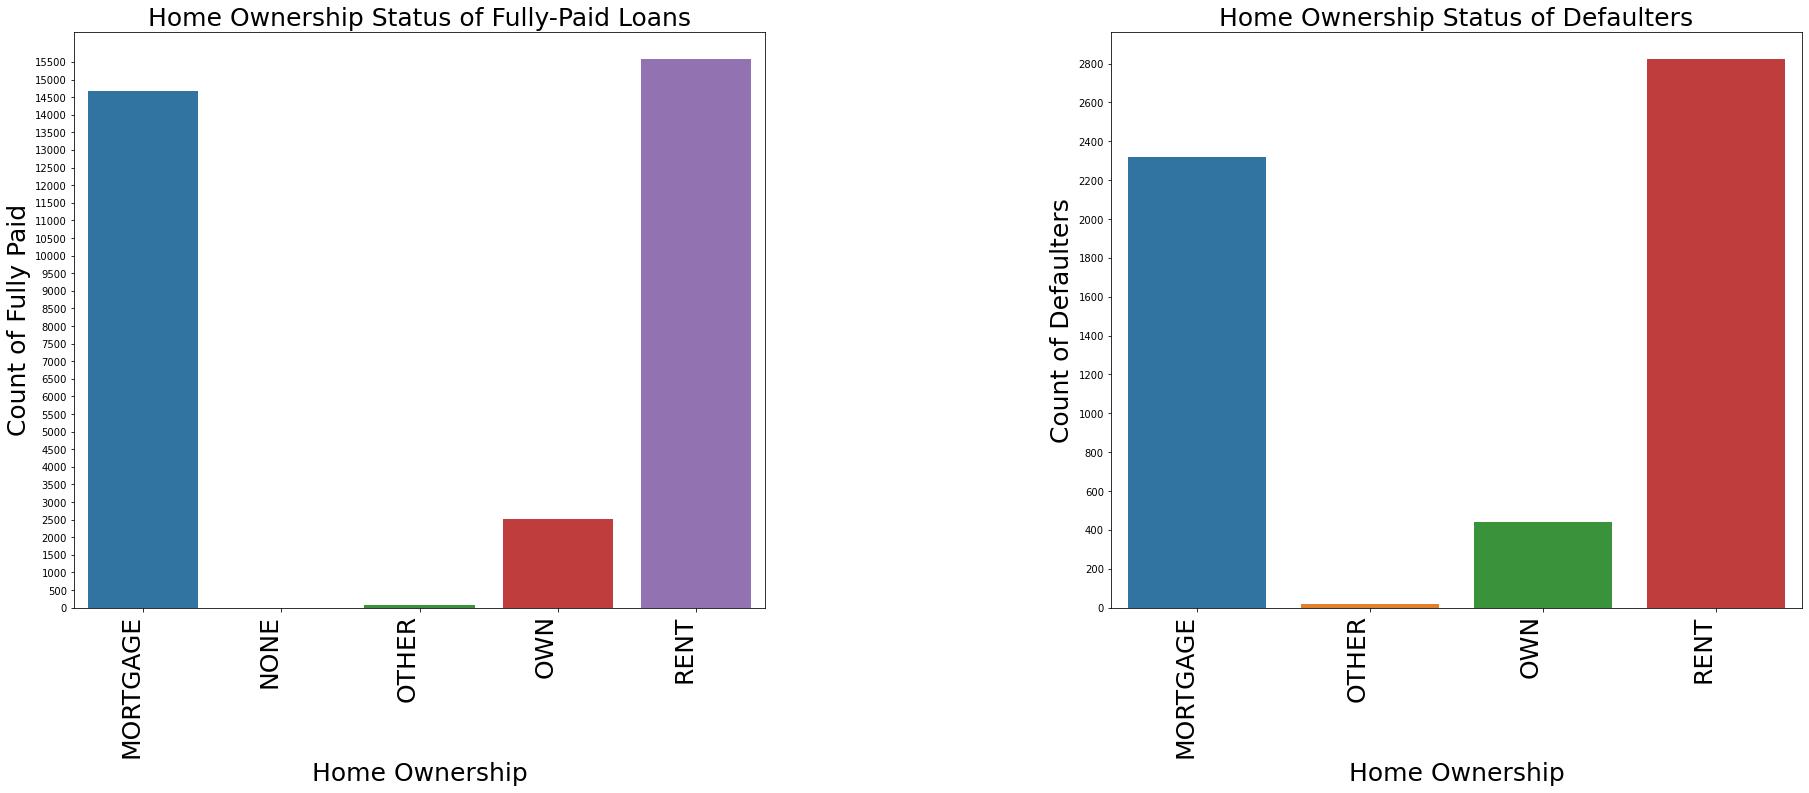

In [191]:
# Risk analysis of 'Home Ownership' wrt risk
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

data_home_paid = data_filtered[data_filtered['loan_status'] == 'Fully Paid']
plt.subplot(1, 2, 1)
plt.title('Home Ownership Status of Fully-Paid Loans', fontsize = 25)
plt.xticks(rotation=90,fontsize = 25, ha='right')
sb.countplot(sorted(data_home_paid['home_ownership']))
plt.yticks(np.arange(0, 16000, 500))
plt.ylabel('Count of Fully Paid', fontsize = 25)
plt.xlabel("Home Ownership", fontsize = 25)


data_home_defaulter = data_filtered[data_filtered['loan_status'] == 'Charged Off']
plt.subplot(1, 2, 2)
plt.title('Home Ownership Status of Defaulters', fontsize = 25)
plt.xticks(rotation=90, fontsize = 25, ha='right')
sb.countplot(sorted(data_home_defaulter['home_ownership']))
plt.yticks(np.arange(0, 3000, 200))
plt.ylabel('Count of Defaulters', fontsize = 25)
plt.xlabel("Home Ownership", fontsize = 25)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

plt.show()


### Conclusion on effect of Home Ownership on defaulting
### Ratio of Fully paid / Defaulted for Mortgage is higher compared to other catagories pointing to low-risk. This might be because if the house is already on mortgage, defaulting means losing it completely and so the borrowers will try their best to repay.

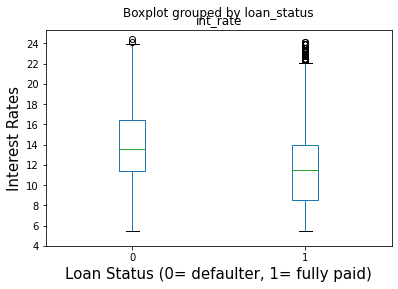

In [161]:
new_data.boxplot(by ='loan_status', column = ['int_rate'], grid = False)
plt.yticks(np.arange(4, 25, 2))
plt.ylabel('Interest Rates', fontsize = 15)
plt.xlabel("Loan Status (0= defaulter, 1= fully paid)", fontsize = 15)
plt.title("Distribution of Interest rates for defaulters and fully-paid", fontsize = 15)

plt.show()

# int_rate box plot indicates that the charged off loans (loan_status = 0) had relatively higher interest rates 
# than the loans that were fully paid off (loan_status = 1)



### Conclusion on effect of Interest rates on defaulting

### Conclusion 1: 50% of fully paid loans av int_rate under 11 (approxximately) 
### and 50% of defaulters have int_rate between 11 to 16
### So we can safely conclude that int_rate of < = 11 can result into low-risk loans

### Conclusion 2: Maximum int_rate in fully-paid is 22 (not considering outliers)
### Which means loans with int_rate > 22 are high-risk and sure shot defaulters. 

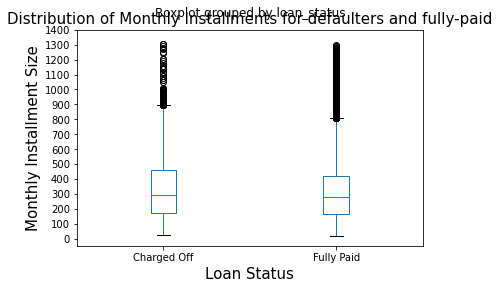

In [174]:
# Analysis of monthly installment size v/s risk

data_filtered.boxplot(by ='loan_status', column = ['installment'], grid = False)
plt.yticks(np.arange(0, 1500, 100))
plt.ylabel('Monthly Installment Size', fontsize = 15)
plt.xlabel("Loan Status", fontsize = 15)
plt.title("Distribution of Monthly Installments for defaulters and fully-paid", fontsize = 15)

plt.show()

### Conclusion on effect of Monthly Installment Size on defaulting

### Conclusion 1: The 50% to 75% distribution of charged-off loan is sligtly larger than fully-paid loans. 
### It shows that if monthly installement is larger, then chances of default is a little higher compared to smaller installments

### Conclusion 2: Max installment of Fully paid is approximately 800 (not considering outliers)
### So installments > 800 are all high-risk loans and more likely to default


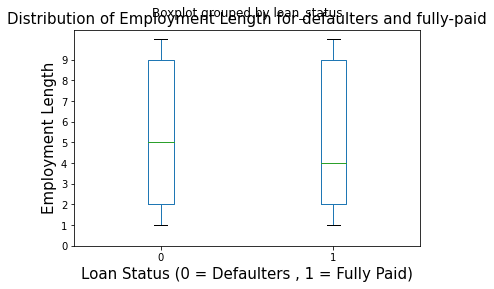

In [177]:
# Analysis of Employment Length size v/s risk

new_data.boxplot(by ='loan_status', column = ['emp_length'], grid = False)
plt.yticks(np.arange(0, 10, 1))
plt.ylabel('Employment Length', fontsize = 15)
plt.xlabel("Loan Status (0 = Defaulters , 1 = Fully Paid)", fontsize = 15)
plt.title("Distribution of Employment Length for defaulters and fully-paid", fontsize = 15)

plt.show()

### Conclusion on effect of employment length on risk
### It is difficult to draw any major insights here. 
### However, median of defaulter is higher than fully paid, which kind of points that people who are longer in the job, are more likely to default. But this is a little contradicting with common logic and hence need further investigations.


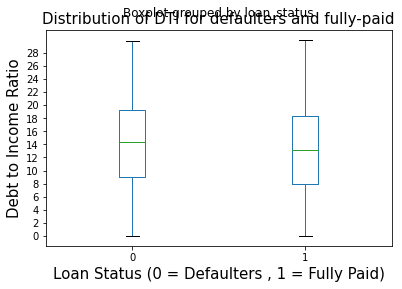

In [180]:
# Analysis of DTI size v/s risk

new_data.boxplot(by ='loan_status', column = ['dti'], grid = False)
plt.yticks(np.arange(0, 30, 2))
plt.ylabel('Debt to Income Ratio', fontsize = 15)
plt.xlabel("Loan Status (0 = Defaulters , 1 = Fully Paid)", fontsize = 15)
plt.title("Distribution of DTI for defaulters and fully-paid", fontsize = 15)

plt.show()

### Conclusion: No major insights on effect of DTI on risk.
### However, 75% of fully paid loans hv DTI< = 18, which means loans to borrowers with DTI > 18 are risky


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


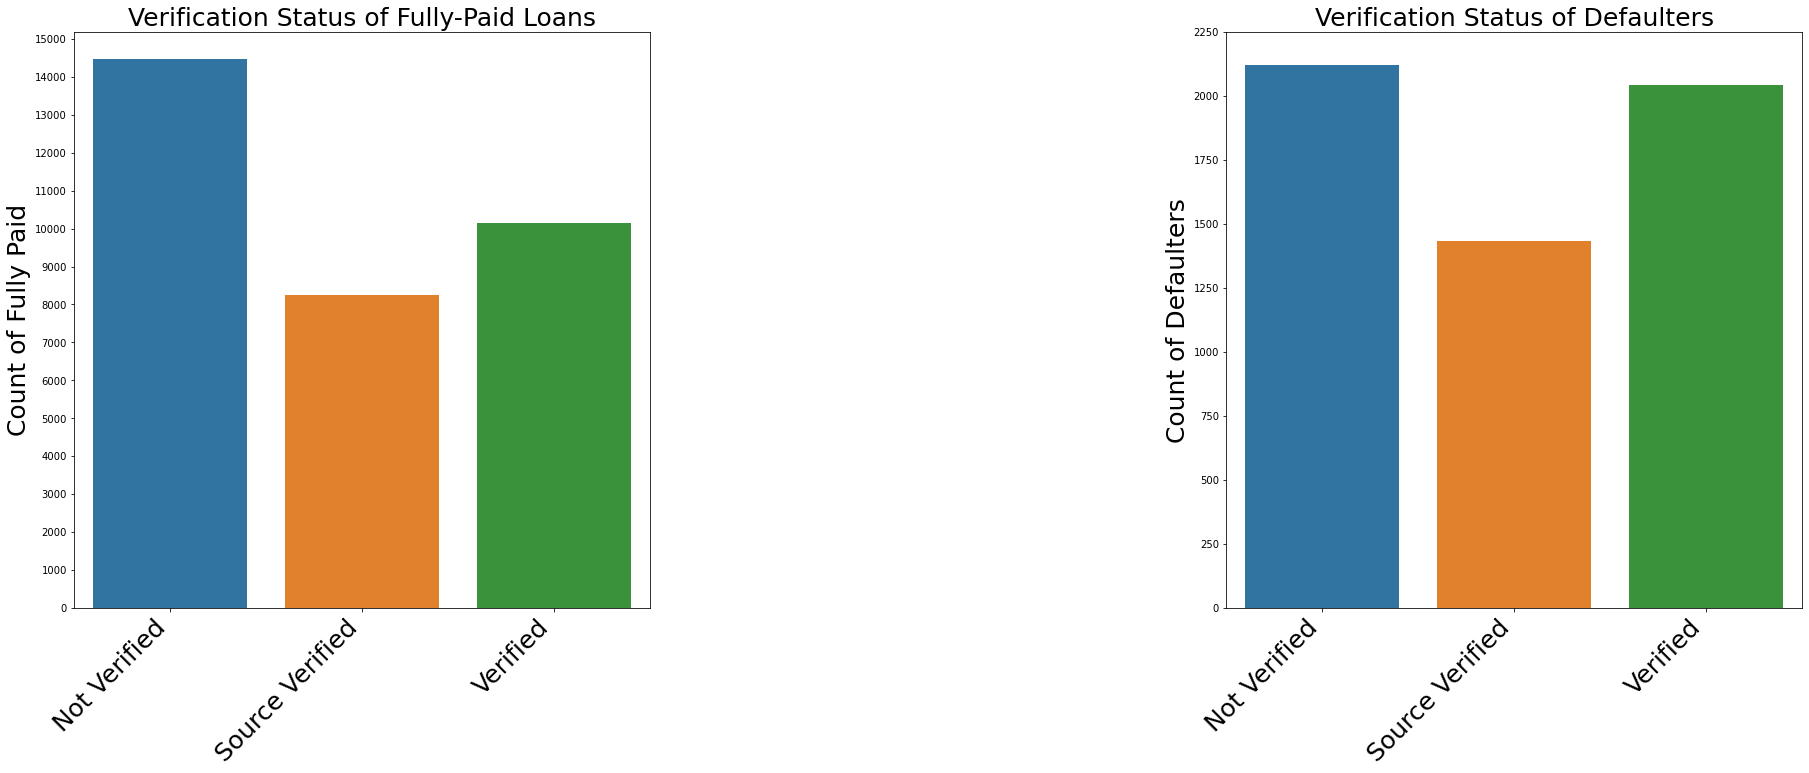

In [184]:
# Analysis of 'Verification Status' v/s Risk
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)


data_verification = data_filtered[data_filtered['loan_status'] == 'Fully Paid']
plt.subplot(1, 2, 1)
plt.title('Verification Status of Fully-Paid Loans', fontsize = 25)
plt.xticks(rotation=45,fontsize = 25, ha='right')
sb.countplot(sorted(data_verification['verification_status']))
plt.yticks(np.arange(0, 16000, 1000))
plt.ylabel('Count of Fully Paid', fontsize = 25)



data_verification = data_filtered[data_filtered['loan_status'] == 'Charged Off']
plt.subplot(1, 2, 2)
plt.title('Verification Status of Defaulters', fontsize = 25)
plt.xticks(rotation=45,fontsize = 25, ha='right')
sb.countplot(sorted(data_verification['verification_status']))
plt.yticks(np.arange(0, 2500, 250))
plt.ylabel('Count of Defaulters', fontsize = 25)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9999, 
                    hspace=0.5)

plt.show()



### Conclusion on effect of Status of Verification on Risk

### Conclusion 1:  The first plot indicates clearly that number of 'Not Verified' borrowers who have fully paid 
### is siggnificantly higher than 'Source Verified' or 'Verified' catagory.

### Conclusion 2: Second graph shows that number of 'Non-verified' defaulters is very close to 'Verified' defaulters with slight higher number

### Conclusion 3: This is a very serious concern. It looks like the verification process itself is faulty and needs to be evaluated and revised

#### BELOW IS THE ROUGH WORK THAT WAS DONE. YOU CAN IGNORE. 

In [ ]:

# data_filtered.boxplot(by ='loan_status', column =['loan_amnt', 'funded_amnt', 'funded_amnt_inv'], grid = False)
# plt.show()

# Three plots of loan_amt, funded_amnt and funded_amnt_inv, shows that the distribution for 
# fully paid, charged off and current loans are quite similar to each other.
# Going ahead we can drop two out of them. As funded_amnt_inv has more outliers, we have decided to drop that. 
# loan_amnt is what was requested by bborrower, whereas funded_amnt is the amount tat was approved after
# some scritiny. SO we feel funded_amnt is logicallyy more rfelevant as far as learning is concerned. 


In [ ]:
# Creating histogram for interest rate for fully paid and defaulters
'''
data_intrate_paid = data_filtered[data_filtered['loan_status'] == 'Fully Paid']
a = sorted(data_intrate_paid['int_rate'])
fig, ax = plt.subplots(figsize =(20, 7))
ax.hist(a, bins = 10)
plt.show()
'''


In [ ]:
'''
new_data.boxplot(by ='loan_status', column = ['term'], grid = False)
plt.show()

# Conclusion: Loans with 36 monts term is more likely to be fully paid
'''